In [1]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
response = requests.get('https://api.census.gov/data/2018/abscs?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,EMPSZFI,EMPSZFI_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN&for=state:*&key=a1b4b7615d90d9627950d637efc7bc6b20fe4304')

In [3]:
raw_json = response.json()

In [4]:
df = pd.DataFrame(raw_json,columns=raw_json.pop(0))

In [5]:
df

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,EMPSZFI,EMPSZFI_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN,state
0,0400000US28,Mississippi,48-49,Transportation and warehousing,651,Firms with 100 to 249 employees,0,0,0,0,28
1,0400000US28,Mississippi,48-49,Transportation and warehousing,652,Firms with 250 to 499 employees,0,0,0,0,28
2,0400000US28,Mississippi,48-49,Transportation and warehousing,657,Firms with 500 employees or more,176,0,26004,1235464,28
3,0400000US28,Mississippi,44-45,Retail trade,001,All firms,7349,0,147752,3589527,28
4,0400000US28,Mississippi,44-45,Retail trade,611,Firms with no employees,478,0,0,14887,28
...,...,...,...,...,...,...,...,...,...,...,...
10158,0400000US27,Minnesota,55,Management of companies and enterprises,641,Firms with 20 to 49 employees,0,0,0,0,27
10159,0400000US27,Minnesota,55,Management of companies and enterprises,642,Firms with 50 to 99 employees,11,0,309,22346,27
10160,0400000US27,Minnesota,55,Management of companies and enterprises,651,Firms with 100 to 249 employees,0,0,0,0,27
10161,0400000US27,Minnesota,55,Management of companies and enterprises,652,Firms with 250 to 499 employees,125,0,2834,193572,27


In [6]:
df['FIRMPDEMP'] = df['FIRMPDEMP'].astype(int)

In [7]:
df['RCPPDEMP'] = df['RCPPDEMP'].astype(int)

In [8]:
df['EMP'] = df['EMP'].astype(int)

In [9]:
df['PAYANN'] = df['PAYANN'].astype(int)

In [10]:
df_trim = df[['NAME','NAICS2017_LABEL','EMPSZFI_LABEL','FIRMPDEMP','RCPPDEMP','EMP','PAYANN']]

In [11]:
df_trim.EMPSZFI_LABEL.value_counts()

All firms                           1070
Firms with 1 to 4 employees         1060
Firms with no employees             1050
Firms with 5 to 9 employees         1042
Firms with 10 to 19 employees       1034
Firms with 20 to 49 employees       1020
Firms with 500 employees or more    1018
Firms with 100 to 249 employees      974
Firms with 50 to 99 employees        966
Firms with 250 to 499 employees      929
Name: EMPSZFI_LABEL, dtype: int64

In [12]:
no_totals = df_trim[df_trim['NAICS2017_LABEL'] != 'Total for all sectors']

In [13]:
no_totals = no_totals[no_totals['EMPSZFI_LABEL'] != 'All firms']

In [14]:
no_totals

,NAME,NAICS2017_LABEL,EMPSZFI_LABEL,FIRMPDEMP,RCPPDEMP,EMP,PAYANN
0,Mississippi,Transportation and warehousing,Firms with 100 to 249 employees,0,0,0,0
1,Mississippi,Transportation and warehousing,Firms with 250 to 499 employees,0,0,0,0
2,Mississippi,Transportation and warehousing,Firms with 500 employees or more,176,0,26004,1235464
4,Mississippi,Retail trade,Firms with no employees,478,0,0,14887
5,Mississippi,Retail trade,Firms with 1 to 4 employees,3877,0,8227,187098
...,...,...,...,...,...,...,...
10158,Minnesota,Management of companies and enterprises,Firms with 20 to 49 employees,0,0,0,0
10159,Minnesota,Management of companies and enterprises,Firms with 50 to 99 employees,11,0,309,22346
10160,Minnesota,Management of companies and enterprises,Firms with 100 to 249 employees,0,0,0,0
10161,Minnesota,Management of companies and enterprises,Firms with 250 to 499 employees,125,0,2834,193572


In [15]:
emp_pay = no_totals[['EMP','PAYANN']]

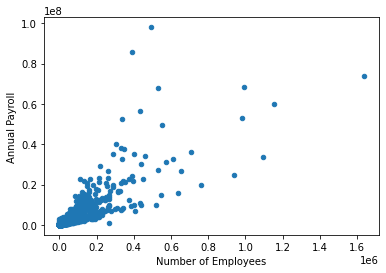

In [16]:
x = np.array(emp_pay.EMP)
y = np.array(emp_pay.PAYANN)

ax = emp_pay.plot.scatter('EMP','PAYANN')
ax.set_xlabel('Number of Employees')
ax.set_ylabel('Annual Payroll')

plt.show()